In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [10]:
df.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5093,ham,Gokila is talking with you aha:),NaN,NaN,NaN
5465,ham,Shall I bring us a bottle of wine to keep us a...,NaN,NaN,NaN
2646,ham,"Em, its olowoyey@ usc.edu have a great time in...",NaN,NaN,NaN
5303,ham,"I can. But it will tell quite long, cos i have...",NaN,NaN,NaN
3014,ham,&lt;#&gt; mins but i had to stop somewhere f...,NaN,NaN,NaN
2844,ham,Will be out of class in a few hours. Sorry,NaN,NaN,NaN
1383,ham,Please reserve ticket on saturday eve from che...,NaN,NaN,NaN
3912,ham,Yeah whatever lol,NaN,NaN,NaN
1068,spam,Someone U know has asked our dating service 2 ...,NaN,NaN,NaN
4115,ham,What you doing?how are you?,NaN,NaN,NaN


In [11]:
df.shape

(5572, 5)

*****Data Cleaning*****

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [13]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [14]:
df.sample(5)

,v1,v2
5339,ham,You'd like that wouldn't you? Jerk!
1129,ham,So check your errors and if you had difficulti...
4637,ham,Captain vijaykanth is doing comedy in captain ...
2696,ham,Nope but i'm going home now then go pump petro...
3412,ham,Where do you need to go to get it?


In [15]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [16]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df.target = encoder.fit_transform(df['target'])

In [18]:
df.sample(3)

,target,text
5138,0,Yup... I havent been there before... You want ...
2152,0,Hi kindly give us back our documents which we ...
1483,0,Purity of friendship between two is not about ...


In [19]:
df.isnull().sum()

,0
target,0
text,0


In [20]:
df.duplicated().sum()

np.int64(403)

In [21]:
df.drop_duplicates(keep='first',inplace=True)

In [22]:
df.shape

(5169, 2)

**EDA**

In [23]:
df.target.value_counts()

,count
target,
0,4516
1,653


([<matplotlib.patches.Wedge at 0x789ead44cad0>,
 [Text(-1.014499732282844, 0.4251944181172162, 'ham'),
  Text(1.0144998708287172, -0.42519408755122207, 'spam')],
 [Text(-0.5533634903360967, 0.2319242280639361, '87.37'),
  Text(0.553363565906573, -0.231924047755212, '12.63')])

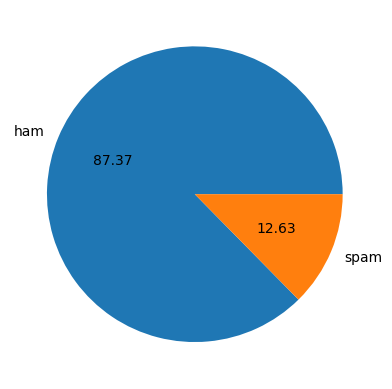

In [24]:
from enum import auto
plt.pie(df.target.value_counts(), labels=["ham","spam"],autopct="%0.2f")

Imbalance dataset

In [25]:
import nltk

In [26]:
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [27]:
df['number_of_characters'] = df['text'].apply(len)

In [28]:
df['number_of_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [29]:
df['number_of_sentences'] = df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [30]:
df.head()

,target,text,number_of_characters,number_of_words,number_of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [31]:
df[['number_of_characters','number_of_sentences','number_of_words']].describe()

,number_of_characters,number_of_sentences,number_of_words
count,5169.000000,5169.000000,5169.000000
mean,78.977945,1.965564,18.455794
std,58.236293,1.448541,13.324758
min,2.000000,1.000000,1.000000
25%,36.000000,1.000000,9.000000
50%,60.000000,1.000000,15.000000
75%,117.000000,2.000000,26.000000
max,910.000000,38.000000,220.000000


In [32]:
#checking for individual classes : for ham

df[df['target'] == 0][['number_of_characters','number_of_sentences','number_of_words']].describe()

,number_of_characters,number_of_sentences,number_of_words
count,4516.000000,4516.000000,4516.000000
mean,70.459256,1.820195,17.123782
std,56.358207,1.383657,13.493970
min,2.000000,1.000000,1.000000
25%,34.000000,1.000000,8.000000
50%,52.000000,1.000000,13.000000
75%,90.000000,2.000000,22.000000
max,910.000000,38.000000,220.000000


In [33]:
# for spam

df[df['target'] == 1][['number_of_characters','number_of_sentences','number_of_words']].describe()

,number_of_characters,number_of_sentences,number_of_words
count,653.000000,653.000000,653.000000
mean,137.891271,2.970904,27.667688
std,30.137753,1.488425,7.008418
min,13.000000,1.000000,2.000000
25%,132.000000,2.000000,25.000000
50%,149.000000,3.000000,29.000000
75%,157.000000,4.000000,32.000000
max,224.000000,9.000000,46.000000


In [34]:
import seaborn as sns

<Axes: xlabel='number_of_characters', ylabel='Count'>

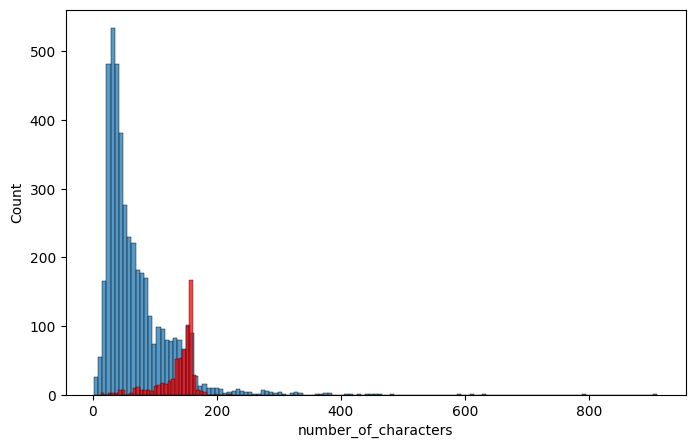

In [35]:
plt.figure(figsize=(8,5))
sns.histplot(df[df['target'] == 0]['number_of_characters'])
sns.histplot(df[df['target'] == 1]['number_of_characters'],color='red')

<Axes: xlabel='number_of_words', ylabel='Count'>

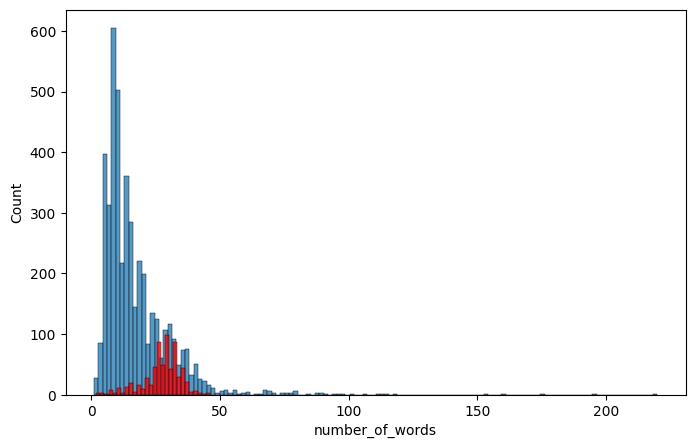

In [36]:
plt.figure(figsize=(8,5))
sns.histplot(df[df['target'] == 0]['number_of_words'])
sns.histplot(df[df['target'] == 1]['number_of_words'],color='red')

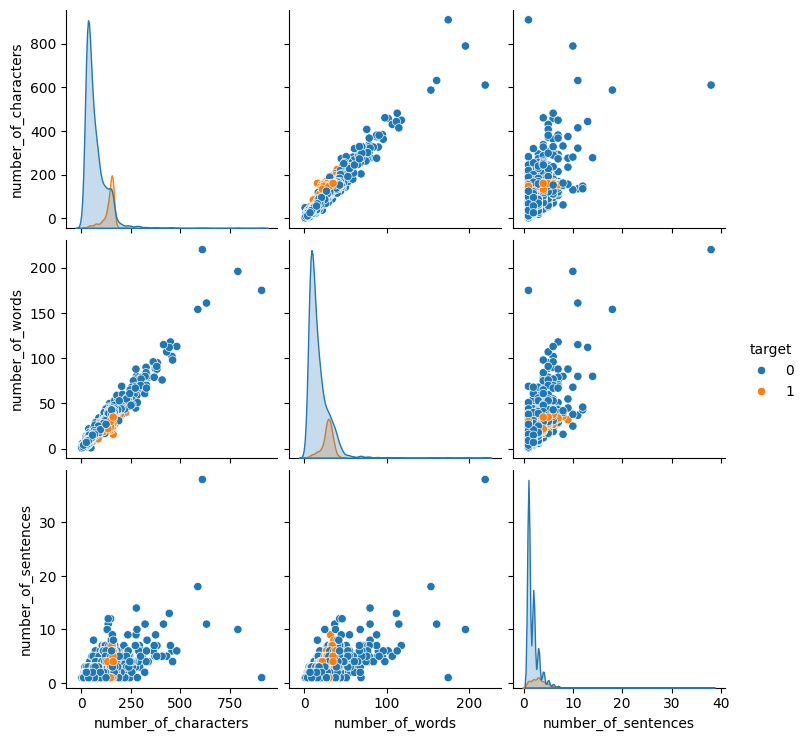

In [37]:
sns.pairplot(df,hue='target')

In [39]:
df[['target','number_of_characters','number_of_words','number_of_sentences']].corr()

,target,number_of_characters,number_of_words,number_of_sentences
target,1.000000,0.384717,0.262912,0.263939
number_of_characters,0.384717,1.000000,0.965760,0.624139
number_of_words,0.262912,0.965760,1.000000,0.679971
number_of_sentences,0.263939,0.624139,0.679971,1.000000


**Data Preprocessing**

1. lower case
2. Tokenization
3. Removing special characters
4. Removing stop words and punctuation
5. Stemming

In [46]:
import string
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))


  return " ".join(y)

In [47]:


transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [48]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [49]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [50]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [51]:
df['tranform_text'] = df['text'].apply(transform_text)

In [52]:
df.head()

,target,text,number_of_characters,number_of_words,number_of_sentences,tranform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [53]:
from wordcloud import WordCloud

wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

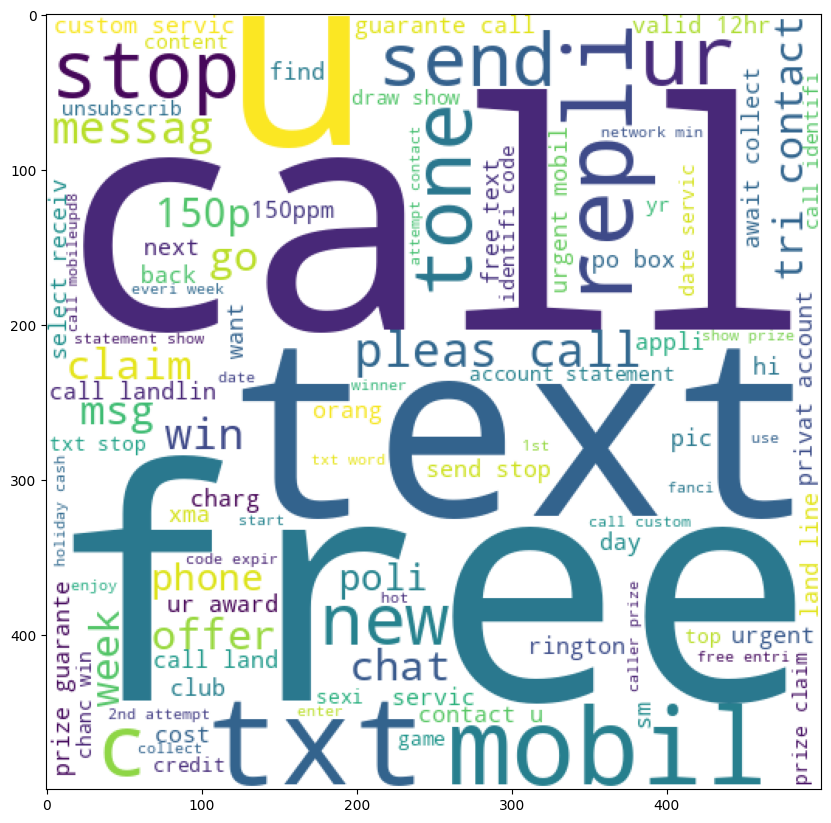

In [54]:
spam_wc = wc.generate(df[df['target'] == 1]['tranform_text'].str.cat(sep=' '))

plt.figure(figsize=(10,15))
plt.imshow(spam_wc)

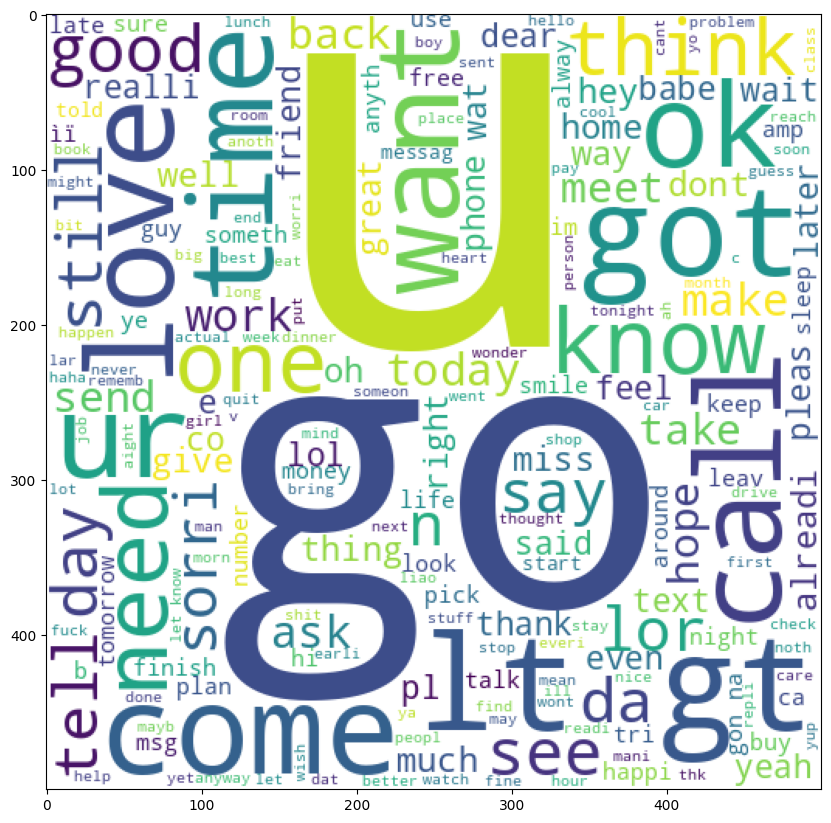

In [55]:
ham_wc = wc.generate(df[df['target'] == 0]['tranform_text'].str.cat(sep=' '))

plt.figure(figsize=(10,15))
plt.imshow(ham_wc)

In [56]:
spam_corpus = []
for msg in df[df['target'] == 1]['tranform_text'].to_list():
  for word in msg.split():
    spam_corpus.append(word)

In [57]:
len(spam_corpus)

9939

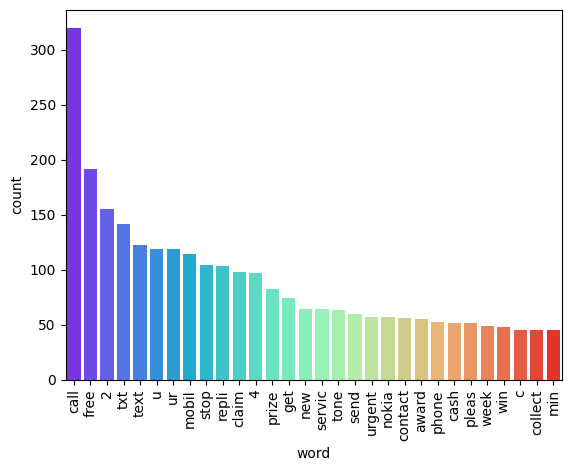

In [58]:
from collections import Counter

most_common_spam_words = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])

sns.barplot(x='word', y='count', data=most_common_spam_words, palette='rainbow', hue='word', legend=False)
plt.xticks(rotation='vertical')
plt.show()

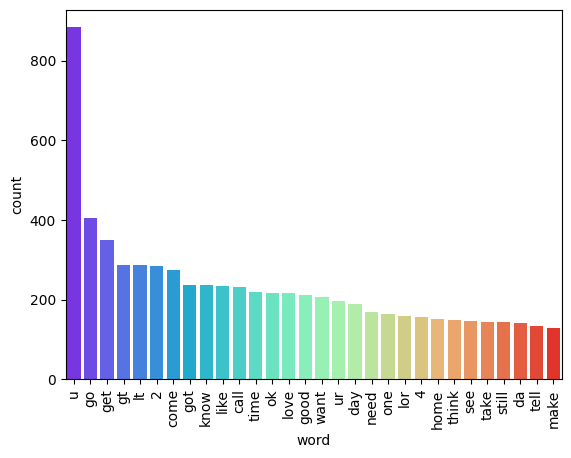

In [59]:
ham_corpus = []
for msg in df[df['target'] == 0]['tranform_text'].to_list():
  for word in msg.split():
    ham_corpus.append(word)



most_common_ham_words = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'count'])

sns.barplot(x='word', y='count', data=most_common_ham_words, palette='rainbow', hue='word', legend=False)
plt.xticks(rotation='vertical')
plt.show()

In [60]:
len(ham_corpus)

35404

**Model Building**

In [61]:
df.head()

,target,text,number_of_characters,number_of_words,number_of_sentences,tranform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


**Changing the words to vector :**

1. bag of words (BoW)
2. Term Frequency-Inverse Document Frequency (TF-IDF)
3. Word2Vec

In [140]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

cv = CountVectorizer()


In [63]:
X = cv.fit_transform(df['tranform_text']).toarray()

In [65]:
X.shape

(5169, 6708)

In [142]:
y = df['target'].values

In [68]:
y.shape

(5169,)

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [70]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

gb = GaussianNB()
mb = MultinomialNB()
bb = BernoulliNB()

In [71]:
gb.fit(X_train,y_train)
y_pred_gb = gb.predict(X_test)

In [72]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

print(accuracy_score(y_test,y_pred_gb))
print(confusion_matrix(y_test,y_pred_gb))
print(precision_score(y_test,y_pred_gb))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [76]:
mb.fit(X_train,y_train)
y_pred_mb = mb.predict(X_test)


print(accuracy_score(y_test,y_pred_mb))
print(confusion_matrix(y_test,y_pred_mb))
print(precision_score(y_test,y_pred_mb))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [77]:
bb.fit(X_train,y_train)
y_pred_bb = bb.predict(X_test)
print(accuracy_score(y_test,y_pred_bb))
print(confusion_matrix(y_test,y_pred_bb))
print(precision_score(y_test,y_pred_bb))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [141]:
tfidf = TfidfVectorizer()

X1 = tfidf.fit_transform(df['tranform_text']).toarray()

In [143]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=2)

In [144]:
gb.fit(X_train,y_train)
y_pred_gb = gb.predict(X_test)

print(accuracy_score(y_test,y_pred_gb))
print(confusion_matrix(y_test,y_pred_gb))
print(precision_score(y_test,y_pred_gb))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [145]:
mb.fit(X_train,y_train)
y_pred_mb = mb.predict(X_test)


print(accuracy_score(y_test,y_pred_mb))
print(confusion_matrix(y_test,y_pred_mb))
print(precision_score(y_test,y_pred_mb))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [146]:
bb.fit(X_train,y_train)
y_pred_bb = bb.predict(X_test)
print(accuracy_score(y_test,y_pred_bb))
print(confusion_matrix(y_test,y_pred_bb))
print(precision_score(y_test,y_pred_bb))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


We are going with tfid and MultinomialNB

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [84]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)


In [85]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb

}

In [86]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred)

  return accuracy, precision


In [87]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9729206963249516, 0.9741379310344828)

In [88]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

  current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

  print("For : ",name)
  print(f'{name} accuracy is {current_accuracy}')
  print(f'{name} precision is {current_precision}')

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

For :  SVC
SVC accuracy is 0.9729206963249516
SVC precision is 0.9741379310344828
For :  KN
KN accuracy is 0.9003868471953579
KN precision is 1.0
For :  NB
NB accuracy is 0.9593810444874274
NB precision is 1.0
For :  DT
DT accuracy is 0.9352030947775629
DT precision is 0.8380952380952381
For :  LR
LR accuracy is 0.9516441005802708
LR precision is 0.94
For :  RF
RF accuracy is 0.971953578336557
RF precision is 1.0
For :  AdaBoost
AdaBoost accuracy is 0.9245647969052224
AdaBoost precision is 0.8409090909090909
For :  BgC
BgC accuracy is 0.9584139264990329
BgC precision is 0.8625954198473282
For :  ETC
ETC accuracy is 0.9729206963249516
ETC precision is 0.9824561403508771
For :  GBDT
GBDT accuracy is 0.9526112185686654
GBDT precision is 0.9238095238095239
For :  xgb
xgb accuracy is 0.9748549323017408
xgb precision is 0.9516129032258065


In [89]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [90]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
5,RF,0.971954,1.000000
8,ETC,0.972921,0.982456
0,SVC,0.972921,0.974138
10,xgb,0.974855,0.951613
4,LR,0.951644,0.940000
9,GBDT,0.952611,0.923810
7,BgC,0.958414,0.862595
6,AdaBoost,0.924565,0.840909


In [91]:
performance_df.sort_values('Accuracy',ascending=False)

,Algorithm,Accuracy,Precision
10,xgb,0.974855,0.951613
8,ETC,0.972921,0.982456
0,SVC,0.972921,0.974138
5,RF,0.971954,1.000000
2,NB,0.959381,1.000000
7,BgC,0.958414,0.862595
9,GBDT,0.952611,0.923810
4,LR,0.951644,0.940000
3,DT,0.935203,0.838095
6,AdaBoost,0.924565,0.840909


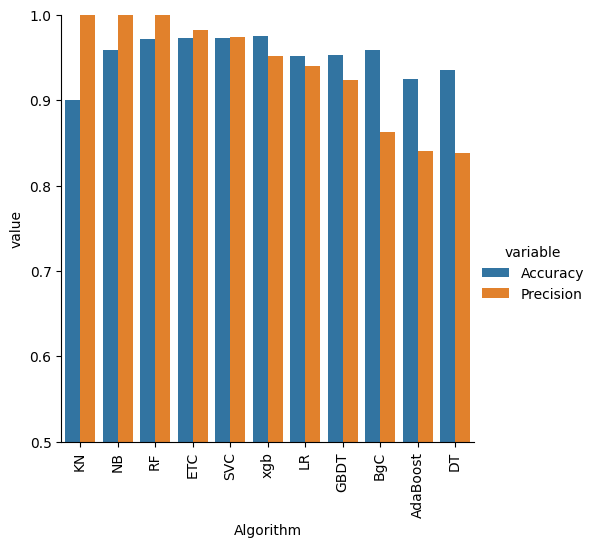

In [92]:
sns.catplot(x = 'Algorithm', y='value', hue='variable',data=performance_df.melt(id_vars='Algorithm'),kind='bar',height=5)

plt.ylim(0.5,1)
plt.xticks(rotation='vertical')
plt.show()

**Model improvement**

In [131]:
# change the max_features parameter of Tf-Idf

tfidf = TfidfVectorizer(max_features=3000)

X2 = tfidf.fit_transform(df['tranform_text']).toarray()

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=2)



In [94]:
gb.fit(X_train,y_train)
y_pred_gb = gb.predict(X_test)

print(accuracy_score(y_test,y_pred_gb))
print(confusion_matrix(y_test,y_pred_gb))
print(precision_score(y_test,y_pred_gb))

0.874274661508704
[[790 106]
 [ 24 114]]
0.5181818181818182


In [95]:
mb.fit(X_train,y_train)
y_pred_mb = mb.predict(X_test)


print(accuracy_score(y_test,y_pred_mb))
print(confusion_matrix(y_test,y_pred_mb))
print(precision_score(y_test,y_pred_mb))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [96]:
bb.fit(X_train,y_train)
y_pred_bb = bb.predict(X_test)
print(accuracy_score(y_test,y_pred_bb))
print(confusion_matrix(y_test,y_pred_bb))
print(precision_score(y_test,y_pred_bb))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [97]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb

}



In [98]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred)

  return accuracy, precision


In [99]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

  current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

  print("For : ",name)
  print(f'{name} accuracy is {current_accuracy}')
  print(f'{name} precision is {current_precision}')

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

For :  SVC
SVC accuracy is 0.9758220502901354
SVC precision is 0.9747899159663865
For :  KN
KN accuracy is 0.9052224371373307
KN precision is 1.0
For :  NB
NB accuracy is 0.9709864603481625
NB precision is 1.0
For :  DT
DT accuracy is 0.9332688588007737
DT precision is 0.8415841584158416
For :  LR
LR accuracy is 0.9555125725338491
LR precision is 0.96
For :  RF
RF accuracy is 0.9738878143133463
RF precision is 0.9826086956521739
For :  AdaBoost
AdaBoost accuracy is 0.9216634429400387
AdaBoost precision is 0.8202247191011236
For :  BgC
BgC accuracy is 0.9584139264990329
BgC precision is 0.8682170542635659
For :  ETC
ETC accuracy is 0.9748549323017408
ETC precision is 0.9745762711864406
For :  GBDT
GBDT accuracy is 0.9506769825918762
GBDT precision is 0.9306930693069307
For :  xgb
xgb accuracy is 0.9680851063829787
xgb precision is 0.9487179487179487


In [100]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_3000_max_features':accuracy_scores,'Precision_3000_max_features':precision_scores}).sort_values('Precision_3000_max_features',ascending=False)

In [114]:
performance_df = performance_df.merge(temp_df,on='Algorithm')


In [107]:
#scaling the features

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X3 = scaler.fit_transform(X)

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X3, y, test_size=0.2, random_state=2)


In [109]:
gb.fit(X_train,y_train)
y_pred_gb = gb.predict(X_test)

print(accuracy_score(y_test,y_pred_gb))
print(confusion_matrix(y_test,y_pred_gb))
print(precision_score(y_test,y_pred_gb))

0.8781431334622823
[[791 105]
 [ 21 117]]
0.527027027027027


In [110]:
mb.fit(X_train,y_train)
y_pred_mb = mb.predict(X_test)


print(accuracy_score(y_test,y_pred_mb))
print(confusion_matrix(y_test,y_pred_mb))
print(precision_score(y_test,y_pred_mb))

0.9729206963249516
[[881  15]
 [ 13 125]]
0.8928571428571429


In [111]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred)

  return accuracy, precision

accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

  current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

  print("For : ",name)
  print(f'{name} accuracy is {current_accuracy}')
  print(f'{name} precision is {current_precision}')

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

For :  SVC
SVC accuracy is 0.9661508704061895
SVC precision is 0.8992248062015504
For :  KN
KN accuracy is 0.9003868471953579
KN precision is 1.0
For :  NB
NB accuracy is 0.9729206963249516
NB precision is 0.8928571428571429
For :  DT
DT accuracy is 0.9235976789168279
DT precision is 0.9154929577464789
For :  LR
LR accuracy is 0.971953578336557
LR precision is 0.990990990990991
For :  RF
RF accuracy is 0.971953578336557
RF precision is 1.0
For :  AdaBoost
AdaBoost accuracy is 0.9197292069632496
AdaBoost precision is 0.9365079365079365
For :  BgC
BgC accuracy is 0.9622823984526112
BgC precision is 0.9159663865546218
For :  ETC
ETC accuracy is 0.97678916827853
ETC precision is 0.9913793103448276
For :  GBDT
GBDT accuracy is 0.9439071566731141
GBDT precision is 0.9444444444444444
For :  xgb
xgb accuracy is 0.9738878143133463
xgb precision is 0.9743589743589743


In [112]:
temp_scale_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scale':accuracy_scores,'Precision_scale':precision_scores}).sort_values('Precision_scale',ascending=False)

In [116]:
performance_df = performance_df.merge(temp_scale_df,on='Algorithm')

In [117]:
performance_df

,Algorithm,Accuracy,Precision,Accuracy_3000_max_features,Precision_3000_max_features,Accuracy_scale,Precision_scale
0,KN,0.900387,1.000000,0.905222,1.000000,0.900387,1.000000
1,NB,0.959381,1.000000,0.970986,1.000000,0.972921,0.892857
2,RF,0.971954,1.000000,0.973888,0.982609,0.971954,1.000000
3,ETC,0.972921,0.982456,0.974855,0.974576,0.976789,0.991379
4,SVC,0.972921,0.974138,0.975822,0.974790,0.966151,0.899225
5,xgb,0.974855,0.951613,0.968085,0.948718,0.973888,0.974359
6,LR,0.951644,0.940000,0.955513,0.960000,0.971954,0.990991
7,GBDT,0.952611,0.923810,0.950677,0.930693,0.943907,0.944444
8,BgC,0.958414,0.862595,0.958414,0.868217,0.962282,0.915966
9,AdaBoost,0.924565,0.840909,0.921663,0.820225,0.919729,0.936508


In [118]:
X = tfidf.fit_transform(df['tranform_text']).toarray()

In [119]:
X = np.hstack((X,df['number_of_characters'].values.reshape(-1,1)))
X.shape

(5169, 3001)

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [121]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb

}

In [122]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred)

  return accuracy, precision

accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

  current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

  print("For : ",name)
  print(f'{name} accuracy is {current_accuracy}')
  print(f'{name} precision is {current_precision}')

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


For :  SVC
SVC accuracy is 0.8665377176015474
SVC precision is 0.0
For :  KN
KN accuracy is 0.9313346228239845
KN precision is 0.8130841121495327
For :  NB
NB accuracy is 0.9400386847195358
NB precision is 1.0
For :  DT
DT accuracy is 0.9468085106382979
DT precision is 0.8807339449541285
For :  LR
LR accuracy is 0.9593810444874274
LR precision is 0.9528301886792453
For :  RF
RF accuracy is 0.9729206963249516
RF precision is 0.9824561403508771
For :  AdaBoost
AdaBoost accuracy is 0.9448742746615088
AdaBoost precision is 0.8932038834951457
For :  BgC
BgC accuracy is 0.960348162475822
BgC precision is 0.8646616541353384
For :  ETC
ETC accuracy is 0.9806576402321083
ETC precision is 0.9836065573770492
For :  GBDT
GBDT accuracy is 0.9506769825918762
GBDT precision is 0.9306930693069307
For :  xgb
xgb accuracy is 0.971953578336557
xgb precision is 0.943089430894309


In [123]:
temp_number_chars = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [125]:
performance_df = performance_df.merge(temp_number_chars, on='Algorithm')

In [126]:
performance_df

,Algorithm,Accuracy,Precision,Accuracy_3000_max_features,Precision_3000_max_features,Accuracy_scale,Precision_scale,Accuracy_num_chars,Precision_num_chars
0,KN,0.900387,1.000000,0.905222,1.000000,0.900387,1.000000,0.931335,0.813084
1,NB,0.959381,1.000000,0.970986,1.000000,0.972921,0.892857,0.940039,1.000000
2,RF,0.971954,1.000000,0.973888,0.982609,0.971954,1.000000,0.972921,0.982456
3,ETC,0.972921,0.982456,0.974855,0.974576,0.976789,0.991379,0.980658,0.983607
4,SVC,0.972921,0.974138,0.975822,0.974790,0.966151,0.899225,0.866538,0.000000
5,xgb,0.974855,0.951613,0.968085,0.948718,0.973888,0.974359,0.971954,0.943089
6,LR,0.951644,0.940000,0.955513,0.960000,0.971954,0.990991,0.959381,0.952830
7,GBDT,0.952611,0.923810,0.950677,0.930693,0.943907,0.944444,0.950677,0.930693
8,BgC,0.958414,0.862595,0.958414,0.868217,0.962282,0.915966,0.960348,0.864662
9,AdaBoost,0.924565,0.840909,0.921663,0.820225,0.919729,0.936508,0.944874,0.893204


In [132]:
#votingClassifier

svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting='soft')

In [133]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [134]:
y_hat = voting.predict(X_test)

In [135]:
print("Accuracy : ",accuracy_score(y_test,y_hat))
print("Precision : ",precision_score(y_test,y_hat))

Accuracy :  0.9796905222437138
Precision :  0.9834710743801653


In [136]:
# Applying Stacking
estimator = estimators=[('svm',svc),('nb',mnb),('et',etc)]
final_estimator = RandomForestClassifier()

from sklearn.ensemble import StackingClassifier

stacking = StackingClassifier(estimators=estimator,final_estimator=final_estimator)

In [137]:
stacking.fit(X_train,y_train)

StackingClassifier(estimators=[('svm',
                                SVC(gamma=1.0, kernel='sigmoid',
                                    probability=True)),
                               ('nb', MultinomialNB()),
                               ('et',
                                ExtraTreesClassifier(n_estimators=50,
                                                     random_state=2))],
                   final_estimator=RandomForestClassifier())

In [138]:
y_hat = stacking.predict(X_test)
print("Accuracy : ",accuracy_score(y_test,y_hat))
print("Precision : ",precision_score(y_test,y_hat))

Accuracy :  0.9806576402321083
Precision :  0.9538461538461539


In [147]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mb,open('model.pkl','wb'))